# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [200]:
pd.__version__

'1.5.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [201]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [202]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [203]:
cast = pd.read_csv('cast.csv')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [204]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [205]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [206]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [12]:
len(movies)

227444

### List all Batman movies ever made

In [13]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [14]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 34


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [15]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
161527,Batman: The Movie,1966
68364,James Batman,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [20]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(harrypotter_df))
harrypotter_df.sort_values(by=['year'], ascending=False)

Total Harry Potter Movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [21]:
len(movies[movies.year == 2017])

10653

### Section I - Q2 : How many movies were made in the year 2015?

In [22]:
len(movies[movies.year == 2015])

8112

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [35]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

105988

### Section I - Q4: How many movies are titled "Hamlet"?

In [37]:
hamlet_df = movies[movies.title == 'Hamlet']
print('Total Hamlet Titled Movies:', len(hamlet_df))
hamlet_df

Total Hamlet Titled Movies: 17


,title,year
1931,Hamlet,2009
8214,Hamlet,1976
46344,Hamlet,1921
55639,Hamlet,2000
73869,Hamlet,1948
98326,Hamlet,1990
118535,Hamlet,1913
124506,Hamlet,1911
140203,Hamlet,1954
155004,Hamlet,1964


### Section I - Q5: List all movies titled "Hamlet"
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [38]:
hamlet_df = movies[(movies.title == 'Hamlet') & (movies.year >= 2000)]
print('Total Hamlet Titled Movies after 2000:', len(hamlet_df))
hamlet_df.sort_values(by=['year'], ascending=True)

Total Hamlet Titled Movies after 2000: 5


,title,year
55639,Hamlet,2000
1931,Hamlet,2009
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [77]:
inception_df = cast[(cast.title == 'Inception') & (cast.n.isnull())]
print('Supporting cast of Inception:', len(inception_df))
inception_df.sort_values(by=['n'], ascending=True)

Supporting cast of Inception: 27


,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [79]:
inception_df = cast[(cast.title == 'Inception') & (~cast.n.isnull())]
print('Number of Main cast of Inception:', len(inception_df))
inception_df.sort_values(by=['n'], ascending=True)

Number of Main cast of Inception: 51


,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception"
- main cast always have an 'n' value
- remember to sort!

In [80]:
inception_df = cast[(cast.title == 'Inception') & (~cast.n.isnull())]
print('Top ten cast of Inception:')
inception_df.sort_values(by=['n'], ascending=True).iloc[:10]

Top ten cast of Inception:


,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore'

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [87]:
#A
dumbledore_df = cast[(cast.character == 'Albus Dumbledore')]
print('All movies with character Albus Dumbledore:', len(dumbledore_df))
dumbledore_df.title

All movies with character Albus Dumbledore: 8


704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [94]:
#B
dumbledore_df = cast[(cast.character == 'Albus Dumbledore')]
print('Actors who played the character Albus Dumbledore:', len(dumbledore_df.name.unique()))
dumbledore_df.name.unique()

Actors who played the character Albus Dumbledore: 5


array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [97]:
#A
keanu_df = cast[cast.name == 'Keanu Reeves']
print('Roles that Keanu Reeves played throughout his career:', len(keanu_df))
keanu_df

Roles that Keanu Reeves played throughout his career: 62


,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892343,A Scanner Darkly,2006,Keanu Reeves,actor,Bob Arctor,4.0
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
...,...,...,...,...,...,...
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892400,Thumbsucker,2005,Keanu Reeves,actor,Perry Lyman,17.0
1892401,To the Bone,2017,Keanu Reeves,actor,Dr. Beckham,11.0
1892402,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0


In [99]:
#B
keanu_df = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1) & (cast.year >= 1999)]
print('Leading Roles that Keanu Reeves played on or after 1999:', len(keanu_df))
keanu_df.sort_values(by=['year'], ascending=True)

Leading Roles that Keanu Reeves played on or after 1999: 15


,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11:

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [100]:
#A
roles_df = cast[(cast.year >= 1950) & (cast.year <= 1960)]
print('Total number of roles available from 1950 - 1960:', len(roles_df))
roles_df

Total number of roles available from 1950 - 1960: 234635


,title,year,name,type,character,n
66,Fire Down Below,1957,'Stretch' Cox Troupe,actor,Limbo Dance by,20.0
67,De zaak M.P.,1960,Frans 't Hoen,actor,Hollandse boer,29.0
68,Dorp aan de rivier,1958,Frans 't Hoen,actor,Dirk Jan,15.0
111,Ci sposeremo a Capri,1956,Quartetto 2+2,actor,Themselves,19.0
116,Thunder in Carolina,1960,2nd Marine Division Band,actor,Themselves,NaN
...,...,...,...,...,...,...
3786059,Styrmand Karlsen,1958,Clara ?st?,actress,The Queen,9.0
3786061,Tre piger fra Jylland,1957,Clara ?st?,actress,Frk. Lind,9.0
3786075,Toya,1956,Aslaug ?ye,actress,moren til Trygve,19.0
3786083,Venner,1960,Bibba ?ygard,actress,Kontordame,NaN


In [102]:
#B
roles_df = cast[(cast.year >= 2007) & (cast.year <= 2017)]
print('Total number of roles available from 2007 - 2017:', len(roles_df))
roles_df

Total number of roles available from 2007 - 2017: 1452413


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
...,...,...,...,...,...,...
3786159,Eldfjall,2011,Katla M. ?orgeirsd?ttir,actress,Home Nurse,NaN
3786160,Svanurinn,2017,Katla M. ?orgeirsd?ttir,actress,?l?f,NaN
3786166,Foreldrar,2007,Lilja Gu?r?n ?orvaldsd?ttir,actress,Katrin Eldri,NaN
3786167,Rokland,2011,Lilja Gu?r?n ?orvaldsd?ttir,actress,A?albj?rg - Dagga's Mother,NaN


### Section I - Q12:

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [103]:
#A
leadingroles_df = cast[(cast.year >= 2000) & (cast.n == 1)]
print('Total number of leading roles available from 2000 to present:', len(leadingroles_df))
leadingroles_df

Total number of leading roles available from 2000 to present: 60568


,title,year,name,type,character,n
102,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
138,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
144,Freelancers,2012,50 Cent,actor,Malo,1.0
145,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
146,Gun,2010,50 Cent,actor,Rich,1.0
...,...,...,...,...,...,...
3785795,120,2008,?zge ?zberk,actress,M?nire,1.0
3785893,6A,2016,Emine ?zkan,actress,Denise,1.0
3785961,Kadife,2012,Ayta? ?ztuna,actress,Kadife Ana,1.0
3786008,Dig og mig,2008,Julie R. ?lgaard,actress,Stephanie,1.0


In [104]:
#B
nonleadingroles_df = cast[(cast.year >= 2000) & (cast.n > 1) & (~cast.n.isnull())]
print('Total number of non-leading roles available from 2000 to present:', len(nonleadingroles_df))
nonleadingroles_df

Total number of non-leading roles available from 2000 to present: 1001710


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
...,...,...,...,...,...,...
3786163,Beowulf & Grendel,2005,Steinunn ?l?na ?orsteinsd?ttir,actress,Wealtheow,15.0
3786164,Eden,2018,Steinunn ?l?na ?orsteinsd?ttir,actress,M??ir Viggu,8.0
3786169,Niceland (Population. 1.000.002),2004,Steinunn ?orvaldsd?ttir,actress,Factory Worker,21.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0


In [105]:
#C
supportroles_df = cast[(cast.year >= 2000) & (cast.n.isnull())]
print('Total number of support/extra-credit roles available from 2000 to present:', len(supportroles_df))
supportroles_df

Total number of support/extra-credit roles available from 2000 to present: 887484


,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
3786159,Eldfjall,2011,Katla M. ?orgeirsd?ttir,actress,Home Nurse,NaN
3786160,Svanurinn,2017,Katla M. ?orgeirsd?ttir,actress,?l?f,NaN
3786166,Foreldrar,2007,Lilja Gu?r?n ?orvaldsd?ttir,actress,Katrin Eldri,NaN
3786167,Rokland,2011,Lilja Gu?r?n ?orvaldsd?ttir,actress,A?albj?rg - Dagga's Mother,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [106]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  17
Macbeth                 15
Carmen                  14
Honeymoon               11
Maya                    11
The Three Musketeers    11
Temptation              11
Othello                 11
Anna Karenina           10
Kismet                  10
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<Axes: >

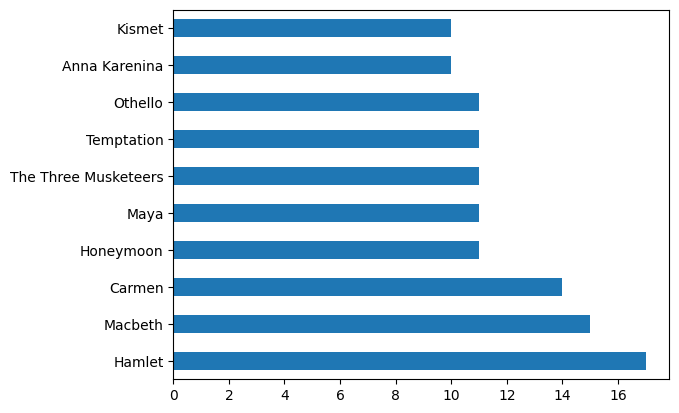

In [107]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [109]:
most_movie = movies[movies.year >= 2000].year.value_counts()[:3]
most_movie

2017    10653
2016     8747
2015     8112
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<Axes: >

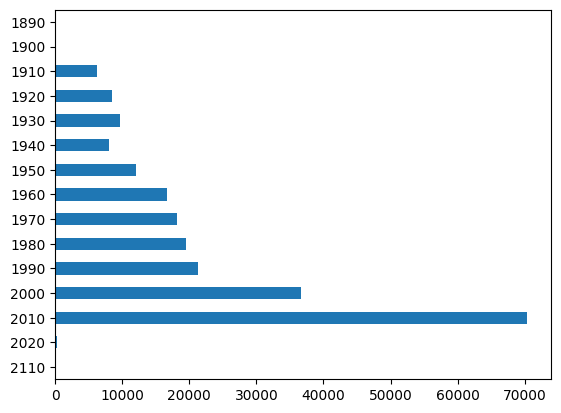

In [162]:
#Question: why is there movie in 2115? Data not cleaned?
movies['decade'] = (movies['year'].floordiv(10))*10
perdecade = (movies.decade.value_counts()).sort_index(ascending=False)
perdecade.plot(kind='barh')

### Section II - Q3:

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [158]:
#A
common_name = cast.character.value_counts()[:10]
common_name

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [160]:
#B
most_her = (cast[cast.character == 'Herself']).name.value_counts()[:10]
most_her

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [161]:
#C
most_him = (cast[cast.character == 'Himself']).name.value_counts()[:10]
most_him

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4:

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [166]:
#A
most_roles = (cast[cast.character.str.startswith('Zombie')]).character.value_counts()[:10]
most_roles

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [167]:
#B
most_roles = (cast[cast.character.str.startswith('Police')]).character.value_counts()[:10]
most_roles

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<Axes: >

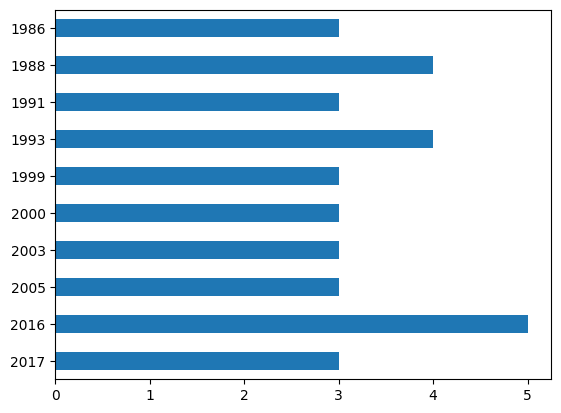

In [169]:
keanu_df = (cast[cast.name == 'Keanu Reeves']).year.value_counts()[:10]
keanu_roles=(keanu_df).sort_index(ascending=False)
keanu_roles.plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


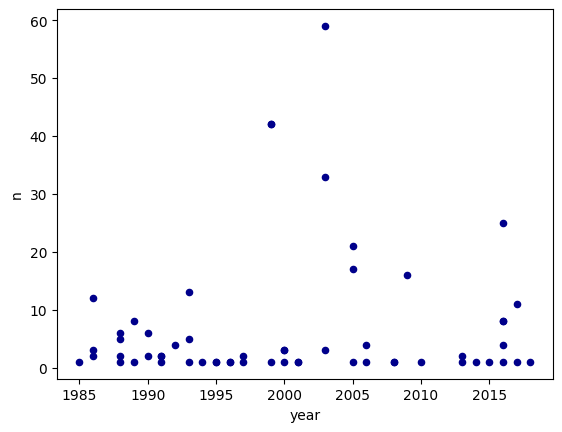

In [171]:
keanu_df = cast[cast.name == 'Keanu Reeves']
ax1 = keanu_df.plot.scatter(x='year', y='n', c='DarkBlue')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<ipython-input-175-be44e431b0f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_df['decade'] = (hamlet_df['year'].floordiv(10))*10


<Axes: >

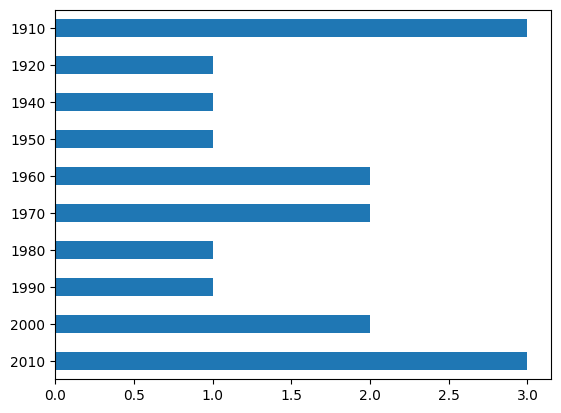

In [175]:
hamlet_df = movies[(movies.title == 'Hamlet')]
hamlet_df['decade'] = (hamlet_df['year'].floordiv(10))*10
hamletperdecade = (hamlet_df.decade.value_counts()).sort_index(ascending=False)
hamletperdecade.plot(kind='barh')

### Section II - Q8:

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [207]:
#A
len(cast[(cast.n == 1) & (cast.year >= 1960) & (cast.year <= 1969)])

11823

In [208]:
#B
len(cast[(cast.n == 1) & (cast.year >= 2000) & (cast.year <= 2009)])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [214]:
foz = cast[(cast.name == 'Frank Oz')]
#foz
dup = foz['title'].duplicated()
foz_double = foz[dup==1]
foz_unique = foz_double.drop_duplicates(subset=['title'])
foz_unique.sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
1723646,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723633,The Great Muppet Caper,1981,Frank Oz,actor,Fozzie Bear,2.0
1723630,The Dark Crystal,1982,Frank Oz,actor,Chamberlain (performer),3.0
1723654,The Muppets Take Manhattan,1984,Frank Oz,actor,Fozzie,2.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
1723639,The Muppet Christmas Carol,1992,Frank Oz,actor,Fozzie Bear as Fozziewig,5.0
1723609,Muppet Treasure Island,1996,Frank Oz,actor,Fozzie Bear,14.0
1723613,Muppets from Space,1999,Frank Oz,actor,Fozzie Bear,7.0
1723626,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Grover,16.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [217]:
foz = cast[(cast.name == 'Frank Oz')]
dup = foz['character'].duplicated()
foz_twice = foz[dup==1]
foz_unique = foz_twice.drop_duplicates(subset=['character'])
foz_unique.sort_values(by=['character'], ascending=True)

,title,year,name,type,character,n
1723614,Muppets from Space,1999,Frank Oz,actor,Animal,7.0
1723625,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Bert,16.0
1723616,Sesame Street: C is for Cookie Monster,2010,Frank Oz,actor,Cookie Monster,NaN
1723613,Muppets from Space,1999,Frank Oz,actor,Fozzie Bear,7.0
1723626,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Grover,16.0
1723608,Muppet Treasure Island,1996,Frank Oz,actor,Miss Piggy,14.0
1723615,Muppets from Space,1999,Frank Oz,actor,Sam the Eagle,7.0
1723619,Star Wars: Episode II - Attack of the Clones,2002,Frank Oz,actor,Yoda,6.0


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: >

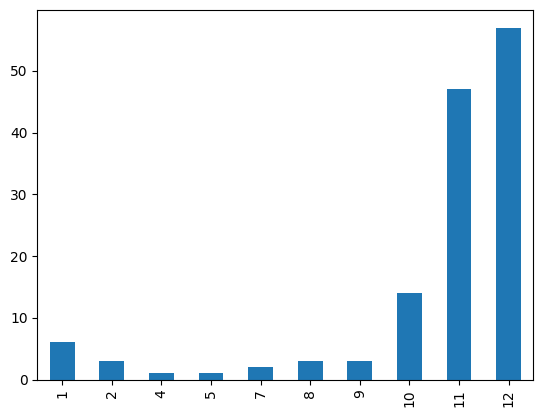

In [219]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: >

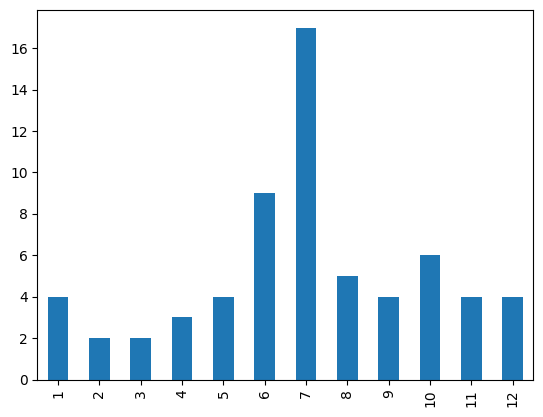

In [222]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<ipython-input-223-00cb31ad5433>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  action.date.dt.week.value_counts().sort_index().plot(kind='bar')


<Axes: >

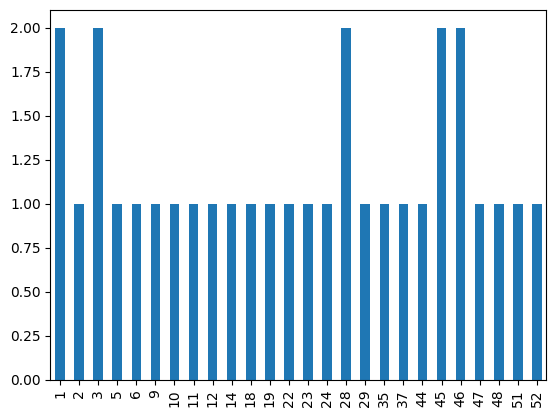

In [223]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [240]:
keanu = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1)]
leadrole = keanu.join(release_dates.set_index(["title","year"]), on=["title", "year"], how="inner", lsuffix="lef_key", rsuffix="right_key")
leadrole_usa = leadrole[leadrole.country == 'USA'].sort_values(by=['date'], ascending=True)
leadrole_usa[{'title', 'date'}]

<ipython-input-240-2c57dfc48c69>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  leadrole_usa[{'title', 'date'}]


,date,title
1892394,1988-04-15,The Night Before
1892346,1989-02-17,Bill & Ted's Excellent Adventure
1892345,1991-07-19,Bill & Ted's Bogus Journey
1892367,1994-05-25,Little Buddha
1892380,1994-06-10,Speed
1892364,1995-05-26,Johnny Mnemonic
1892344,1995-08-11,A Walk in the Clouds
1892347,1996-08-02,Chain Reaction
1892354,1996-09-13,Feeling Minnesota
1892386,1997-10-17,The Devil's Advocate


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<Axes: >

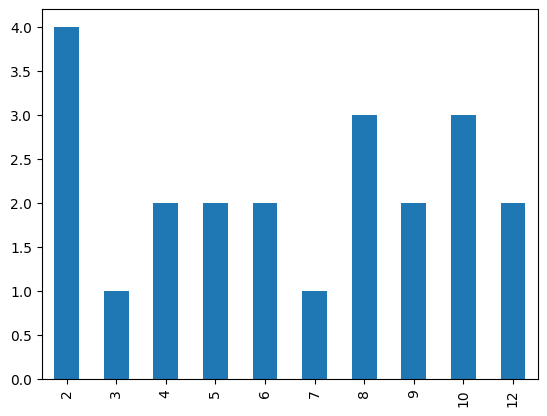

In [241]:
leadrole_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<Axes: >

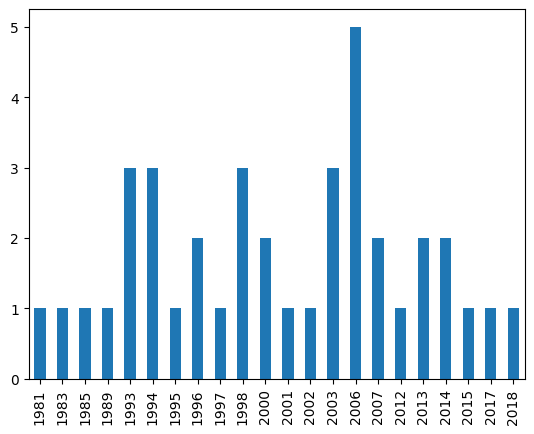

In [242]:
mckellen = cast[(cast.name == 'Ian McKellen')]
ian = mckellen.join(release_dates.set_index(["title","year"]), on=["title", "year"], how="inner", lsuffix="lef_key", rsuffix="right_key")
ian = ian[ian.country == 'USA'].sort_values(by=['date'], ascending=True)
ian.date.dt.year.value_counts().sort_index().plot(kind='bar')